In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math as ma
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter
from astropy import units as u
import astropy 
from scipy.interpolate import interp1d

from scipy.io import readsav

import sys
sys.path.append('/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules')
import loadfilt as lf
import igm # ISM/IGM absorption routines...

import extinction

import gc
import glob
import re

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 32

In [2]:
def log_formatter(x,pos):
    return format(np.log10(x), '.0f')

def div_formatter(x,pos):
    return format(x/1000, '.1f')

def GHzFormatter(x,pos):
    return format(x/1e9, '.2e')
GHzfmt  = FuncFormatter(GHzFormatter)
divfmt  = FuncFormatter(div_formatter)
logfmt  = FuncFormatter(log_formatter)
nullfmt = NullFormatter()

In [3]:
gc.collect()

256

In [4]:
np.set_printoptions(linewidth=100)
labelsize=18

In [5]:
import importlib
importlib.reload(lf)

<module 'loadfilt' from '/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules/loadfilt.py'>

In [6]:
hubbleFilters = lf.loadHubbleFilters(suppress=True)
jhkFilters = lf.loadJHKFilters(suppress=True)
jwstFilters = lf.loadJWSTFilters(suppress=True)
hubbleFilters.keys(),jhkFilters.keys(),jwstFilters.keys()

(dict_keys(['F160W_WFC3', 'F435W_ACS', 'F275W_WFC3', 'F098M_WFC3', 'F105W_WFC3', 'F775W_ACS', 'F125W_WFC3', 'F336W_WFC3', 'F850LP_ACS', 'F225W_WFC3', 'F606W_ACS']),
 dict_keys(['H', 'J', 'Ks']),
 dict_keys(['f115w', 'f070w', 'f335m', 'f300m', 'f460m', 'f480m', 'f162m', 'f210m', 'f140m', 'f090w', 'f410m', 'f356w', 'f360m', 'f250m', 'f430m', 'f150w', 'f277w', 'f444w', 'f200w', 'f182m']))

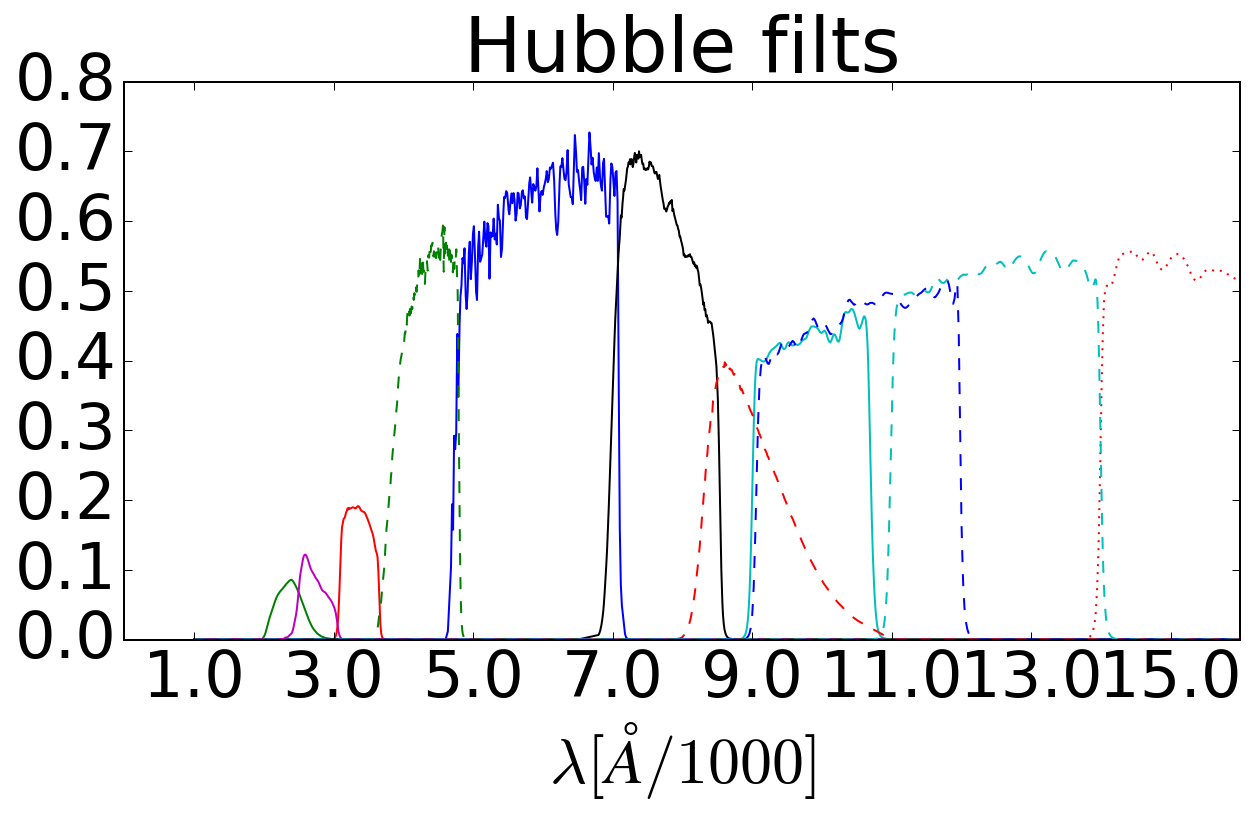

In [7]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
theRange = np.arange(1000,1.6e4)
ax.plot(theRange,hubbleFilters['F336W_WFC3'](theRange),'r-')
ax.plot(theRange,hubbleFilters['F225W_WFC3'](theRange),'g-')
ax.plot(theRange,hubbleFilters['F606W_ACS'](theRange),'b-')
ax.plot(theRange,hubbleFilters['F098M_WFC3'](theRange),'c-')
ax.plot(theRange,hubbleFilters['F160W_WFC3'](theRange),'r:')
ax.plot(theRange,hubbleFilters['F775W_ACS'](theRange),'k-')
ax.plot(theRange,hubbleFilters['F275W_WFC3'](theRange),'m-')
ax.plot(theRange,hubbleFilters['F850LP_ACS'](theRange),'r--')
ax.plot(theRange,hubbleFilters['F435W_ACS'](theRange),'g--')
ax.plot(theRange,hubbleFilters['F105W_WFC3'](theRange),'b--')
ax.plot(theRange,hubbleFilters['F125W_WFC3'](theRange),'c--')
ax.xaxis.set_major_formatter(divfmt)
ax.set_xticks([1e3,3e3,5e3,7e3,9e3,11e3,13e3,15e3])
ax.set_xlabel(r'$\lambda [\AA/1000]$')
ax.set_title(r'Hubble filts')

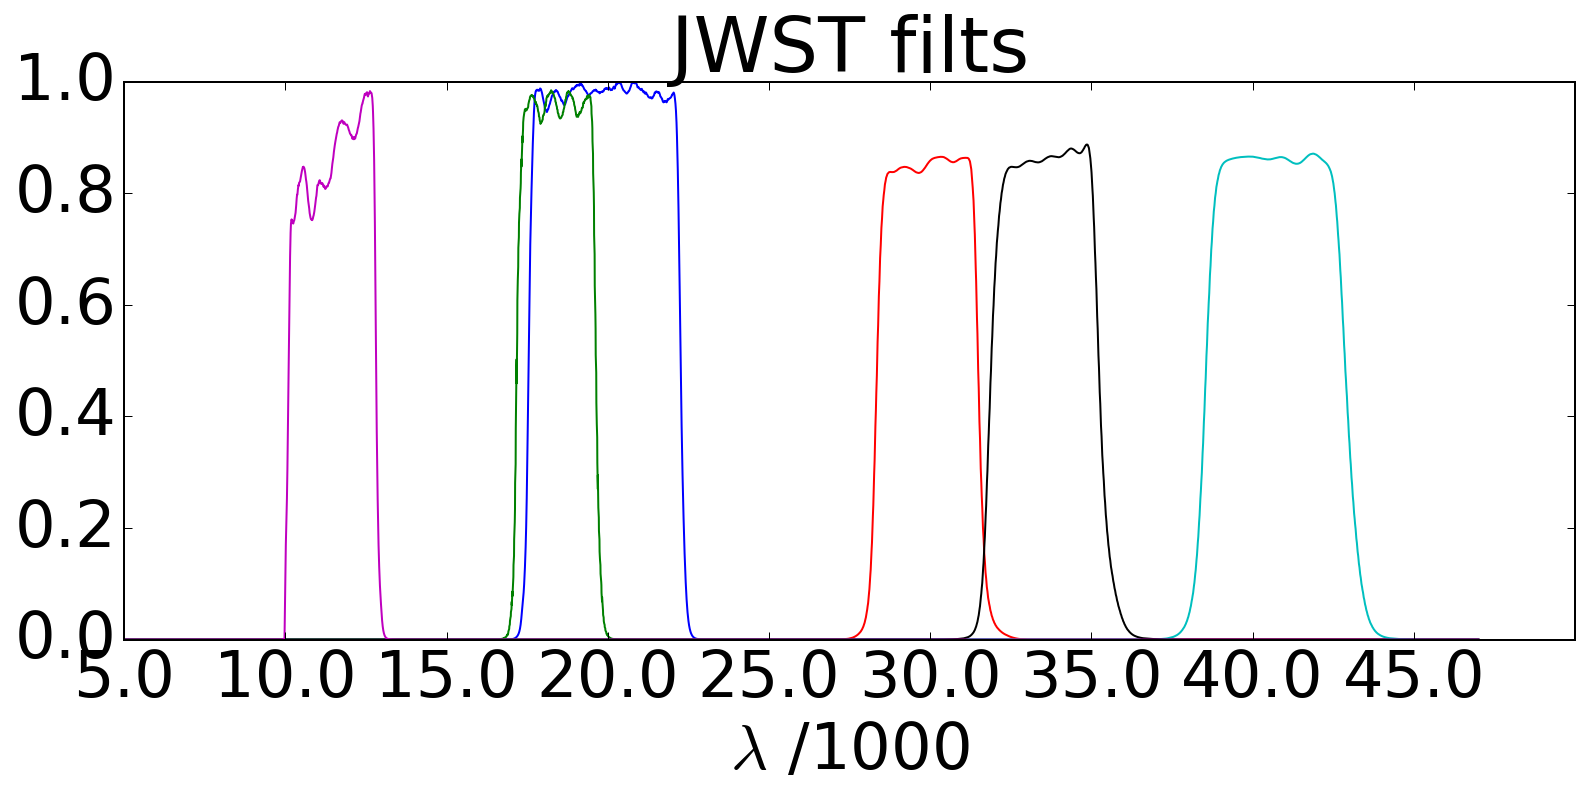

In [8]:
# ['f200w', 'f182m', 'f300m', 'f410m', 'f335m', 'f115w', 'f430m', 'f460m', 'f356w', 'f150w', 'f162m', 
# 'f360m', 'f277w', 'f140m', 'f070w', 'f480m', 'f444w', 'f090w', 'f210m', 'f250m']
fig = plt.figure(figsize=(13,5))
ax = plt.axes()
theRange = np.arange(5000,47000)
ax.plot(theRange,jwstFilters['f200w'](theRange),'b-')
ax.plot(theRange,jwstFilters['f182m'](theRange),'g-')
ax.plot(theRange,jwstFilters['f300m'](theRange),'r-')
ax.plot(theRange,jwstFilters['f410m'](theRange),'c-')
ax.plot(theRange,jwstFilters['f335m'](theRange),'k-')
ax.plot(theRange,jwstFilters['f115w'](theRange),'m-')
ax.xaxis.set_major_formatter(divfmt)
ax.set_xlabel(r'$\lambda$ /1000')
ax.set_xticks([5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3,45e3])
ax.set_title(r'JWST filts')


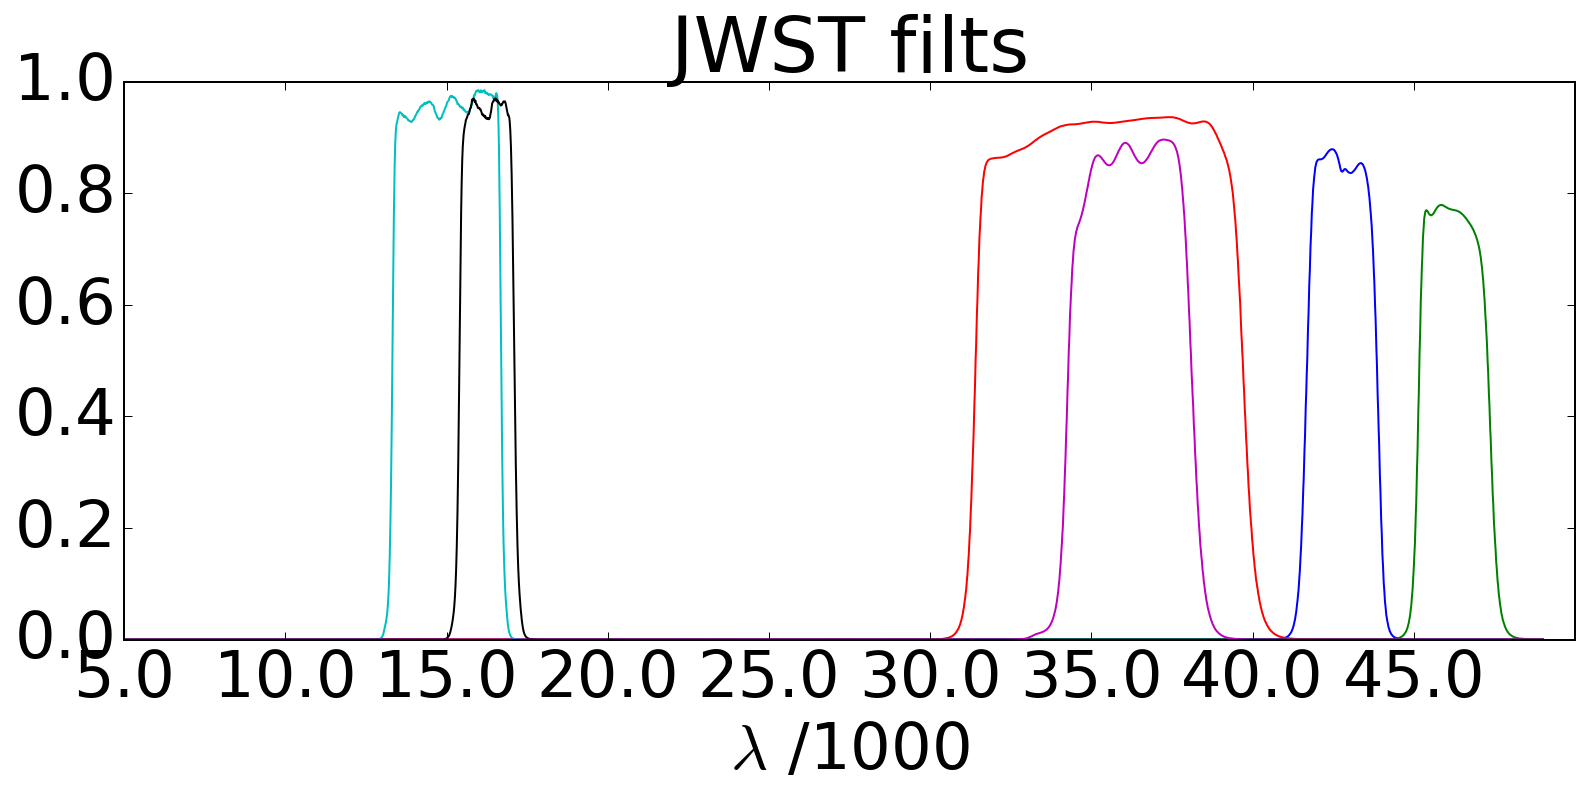

In [9]:
# ['f200w', 'f182m', 'f300m', 'f410m', 'f335m', 'f115w', 'f430m', 'f460m', 'f356w', 'f150w', 'f162m', 
# 'f360m', 'f277w', 'f140m', 'f070w', 'f480m', 'f444w', 'f090w', 'f210m', 'f250m']
fig = plt.figure(figsize=(13,5))
ax = plt.axes()
theRange = np.arange(5000,49000)
ax.plot(theRange,jwstFilters['f430m'](theRange),'b-')
ax.plot(theRange,jwstFilters['f460m'](theRange),'g-')
ax.plot(theRange,jwstFilters['f356w'](theRange),'r-')
ax.plot(theRange,jwstFilters['f150w'](theRange),'c-')
ax.plot(theRange,jwstFilters['f162m'](theRange),'k-')
ax.plot(theRange,jwstFilters['f360m'](theRange),'m-')
ax.xaxis.set_major_formatter(divfmt)
ax.set_xlabel(r'$\lambda$ /1000')
ax.set_xticks([5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3,45e3])
ax.set_title(r'JWST filts')


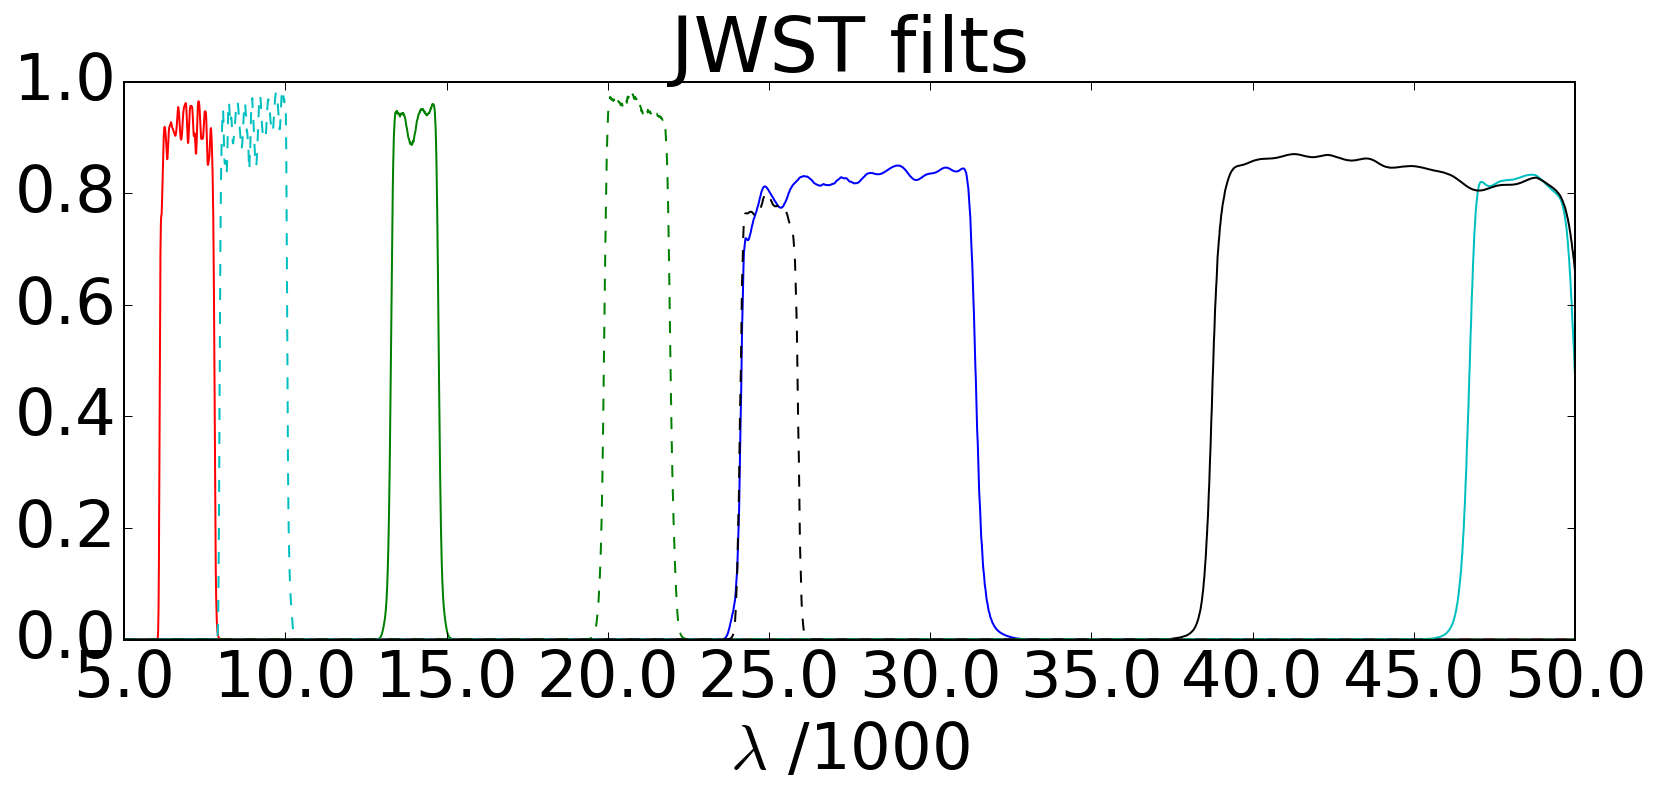

In [10]:
# ['f200w', 'f182m', 'f300m', 'f410m', 'f335m', 'f115w', 'f430m', 'f460m', 'f356w', 'f150w', 'f162m', 
# 'f360m', 'f277w', 'f140m', 'f070w', 'f480m', 'f444w', 'f090w', 'f210m', 'f250m']
fig = plt.figure(figsize=(13,5))
ax = plt.axes()
theRange = np.arange(5000,50000)
ax.plot(theRange,jwstFilters['f277w'](theRange),'b-')
ax.plot(theRange,jwstFilters['f140m'](theRange),'g-')
ax.plot(theRange,jwstFilters['f070w'](theRange),'r-')
ax.plot(theRange,jwstFilters['f480m'](theRange),'c-')
ax.plot(theRange,jwstFilters['f444w'](theRange),'k-')
ax.plot(theRange,jwstFilters['f090w'](theRange),'c--')
ax.plot(theRange,jwstFilters['f210m'](theRange),'g--')
ax.plot(theRange,jwstFilters['f250m'](theRange),'k--')
ax.xaxis.set_major_formatter(divfmt)
ax.set_xlabel(r'$\lambda$ /1000')
ax.set_xticks([5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3,45e3,50e3])
ax.set_title(r'JWST filts')


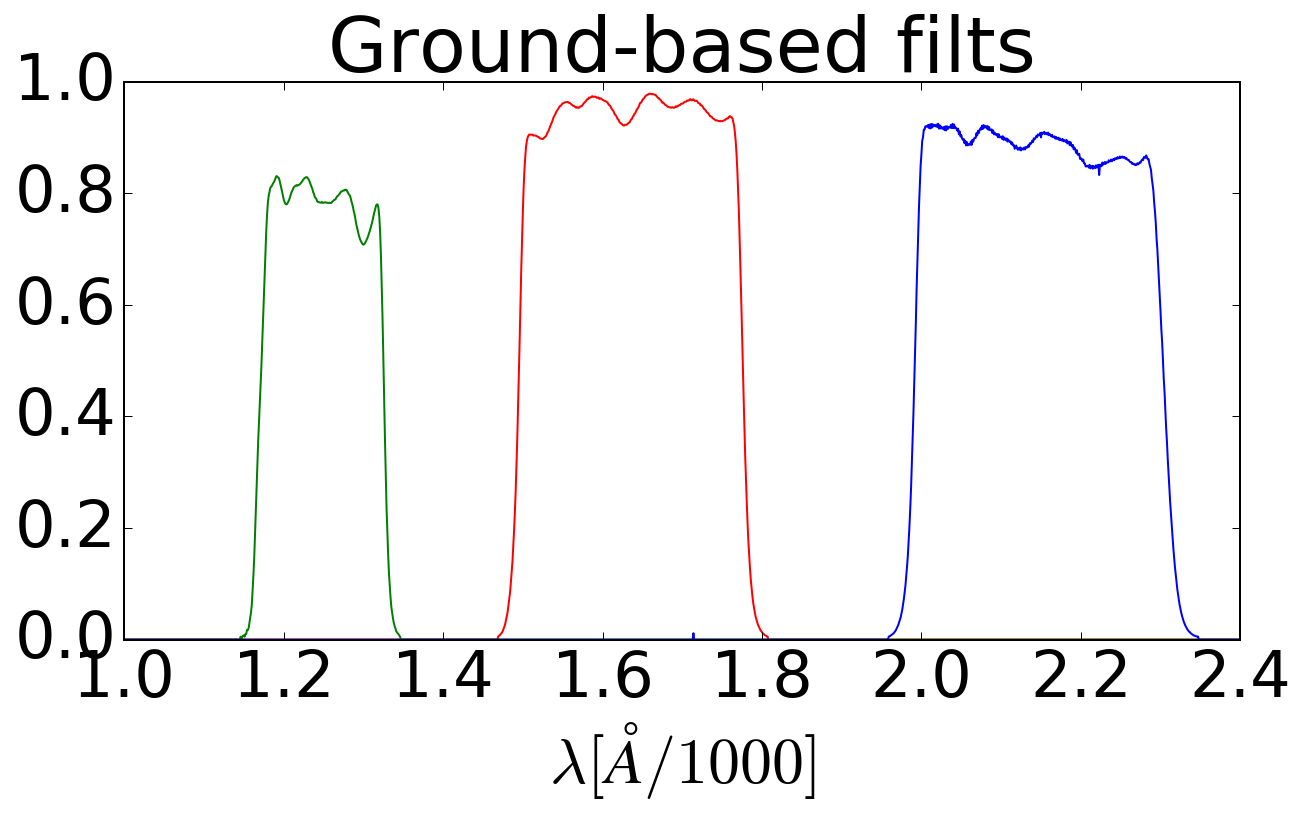

In [11]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
theRange = np.arange(1000,2.4e3)
ax.plot(theRange,jhkFilters['H'](theRange),'r-')
ax.plot(theRange,jhkFilters['J'](theRange),'g-')
ax.plot(theRange,jhkFilters['Ks'](theRange),'b-')
ax.xaxis.set_major_formatter(divfmt)
# ax.set_xticks([1e3,2e3,5e3,7e3,9e3])
ax.set_xlabel(r'$\lambda [\AA/1000]$')
ax.set_title(r'Ground-based filts')

# Seth flux, my flux - BC03

In [12]:
#
# Load Seth's data for z = 2
# PADOVA data 1994
#
sethPath = '/Users/earnric/Research/Research-Observability/Software-Models/sethData'
sethFile160z2 = sethPath + '/F160W_WFC3_bc_2.00' # IDL Save file
sethFile225z2 = sethPath + '/F225W_WFC3_bc_2.00' # IDL Save file
sethFile435z2 = sethPath + '/F435W_ACS_bc_2.00'  # IDL Save file
sethFile098z2 = sethPath + '/F098M_WFC3_bc_2.00' # IDL Save file
sethFile850z2 = sethPath + '/F850LP_ACS_bc_2.00' # IDL Save file
sethFile775z2 = sethPath + '/F775W_ACS_bc_2.00' # IDL Save file
seth160z2Data = readsav(sethFile160z2)
seth225z2Data = readsav(sethFile225z2)
seth435z2Data = readsav(sethFile435z2)
seth098z2Data = readsav(sethFile098z2)
seth850z2Data = readsav(sethFile850z2)
seth775z2Data = readsav(sethFile775z2)
seth160z2Data.keys()
sethsData = ['seth160z2Data' ,'seth225z2Data', 'seth435z2Data', 'seth098z2Data', 'seth850z2Data', 'seth775z2Data']

In [13]:
# Entry 5 -> A_v = 1.0
seth160z2Data['filtfluxz'][0]

array([[  1.41867494e-38,   1.41874794e-38,   1.41872744e-38, ...,   1.68771881e-40,
          1.55065857e-40,   1.46249885e-40],
       [  1.41873636e-38,   1.41871789e-38,   1.41873282e-38, ...,   1.68167528e-40,
          1.54620788e-40,   1.45673890e-40],
       [  1.41870951e-38,   1.41873019e-38,   1.41873144e-38, ...,   1.68437863e-40,
          1.55091648e-40,   1.45815823e-40],
       ..., 
       [  1.41871036e-38,   1.41873974e-38,   1.41871749e-38, ...,   5.81886058e-40,
          5.32284149e-40,   4.89466034e-40],
       [  1.41873295e-38,   1.41871893e-38,   1.41874331e-38, ...,   7.05963074e-40,
          6.59181490e-40,   6.18733610e-40],
       [  1.41868668e-38,   1.41871662e-38,   1.41869840e-38, ...,   6.43629919e-40,
          5.95112016e-40,   5.53133653e-40]])

In [14]:
seth160z2Data['age'][0:5],seth160z2Data['filtfluxz'][5][0][0:5],seth160z2Data['filtfluxz'][0][0][0:5]

(array([ 125893.,  141254.,  158489.,  177828.,  199527.], dtype=float32),
 array([  4.79975428e-39,   4.80000122e-39,   4.79993190e-39,   4.79982817e-39,   4.79992328e-39]),
 array([  1.41867494e-38,   1.41874794e-38,   1.41872744e-38,   1.41869676e-38,   1.41872488e-38]))

In [15]:
#
# Load Seth's data for z = 6
# PADOVA data 1994
#
sethFile160z6 = sethPath + '/F160W_WFC3_bc_6.00' # IDL Save file
sethFile225z6 = sethPath + '/F225W_WFC3_bc_6.00' # IDL Save file
sethFile435z6 = sethPath + '/F435W_ACS_bc_6.00'  # IDL Save file
sethFile098z6 = sethPath + '/F098M_WFC3_bc_6.00' # IDL Save file
sethFile850z6 = sethPath + '/F850LP_ACS_bc_6.00' # IDL Save file
sethFile775z6 = sethPath + '/F775W_ACS_bc_6.00' # IDL Save file
seth160z6Data = readsav(sethFile160z6)
seth225z6Data = readsav(sethFile225z6)
seth435z6Data = readsav(sethFile435z6)
seth098z6Data = readsav(sethFile098z6)
seth850z6Data = readsav(sethFile850z6)
seth775z6Data = readsav(sethFile775z6)
seth160z6Data.keys()

dict_keys(['filtfluxz', 'age', 'av', 'wave', 'tau'])

In [16]:
seth225z6Data['filtfluxz'][seth225z6Data['filtfluxz'] > 0]

array([], dtype=float64)

In [17]:
import importlib
importlib.reload(igm)
importlib.reload(lf)

<module 'loadfilt' from '/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules/loadfilt.py'>

# Load my flux-in-filter files... 

In [18]:
sb9902fluxz2 = np.genfromtxt('./SB9902_2.0.gz',names=True, delimiter=',')

magAbsorpValues = extinction.calzetti00(np.arange(20.,25000.),1.0,4.05)
absorpFunc = interp1d(np.arange(20.,25000.),magAbsorpValues,kind='slinear',bounds_error=False,fill_value=0.0)


5113

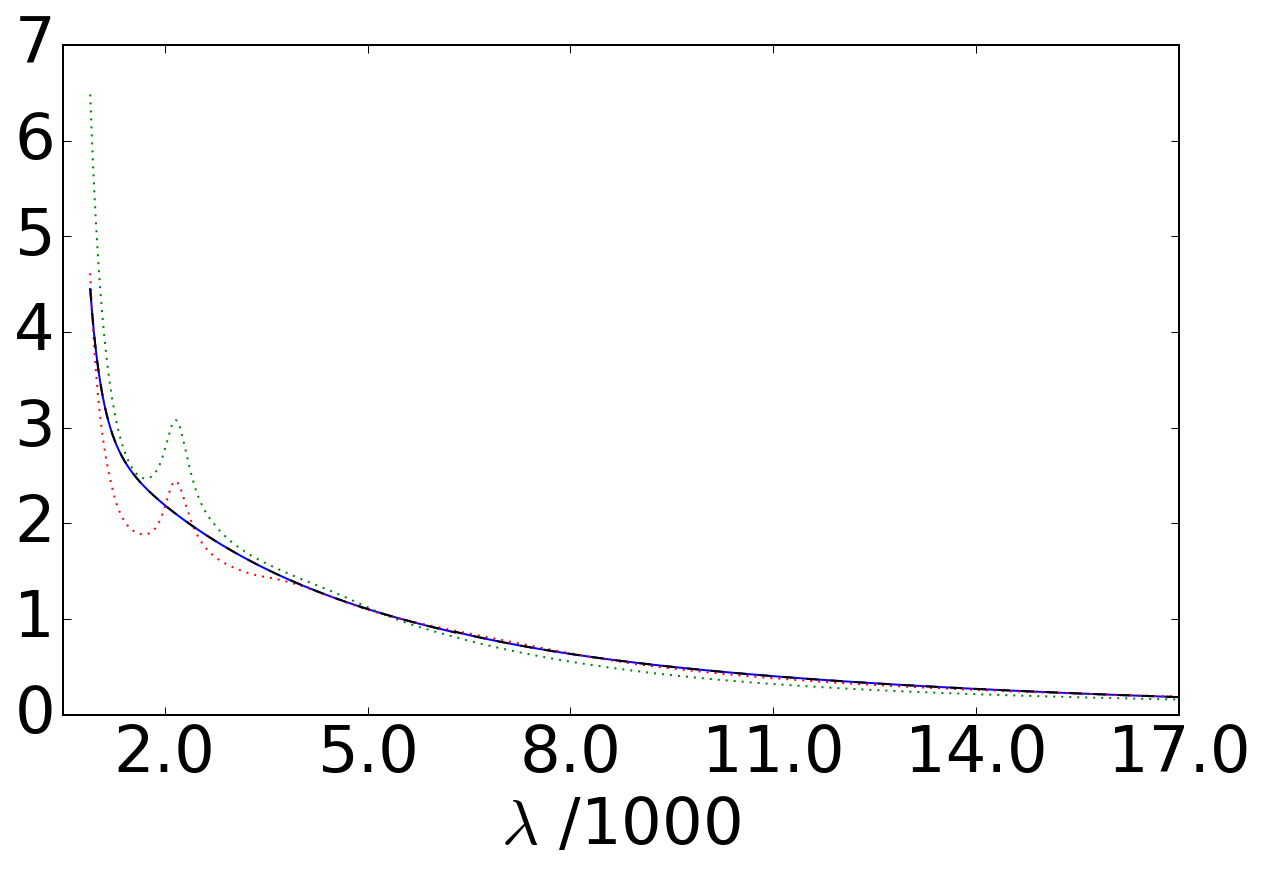

In [19]:
# Dust absorption in each band...
# R_V = 4.05 is best value for Calzetti, 2000
# Seth also uses Calzetti and R_V = 4.05
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
theRange = np.arange(900.,20000.)
ax.plot(theRange,extinction.calzetti00(theRange,1.0,4.05),'b-')
ax.plot(theRange,extinction.fitzpatrick99(theRange,1.0),'g:')
ax.plot(theRange,extinction.ccm89(theRange,1.0,4.05),'r:')
ax.plot(theRange,absorpFunc(theRange),'k--')
ax.xaxis.set_major_formatter(divfmt)
ax.set_xlabel('$\lambda$ /1000')
ax.set_xlim([500,17000])
ax.set_xticks([2e3,5e3,8e3,11e3,14e3,17e3])
gc.collect()

21084

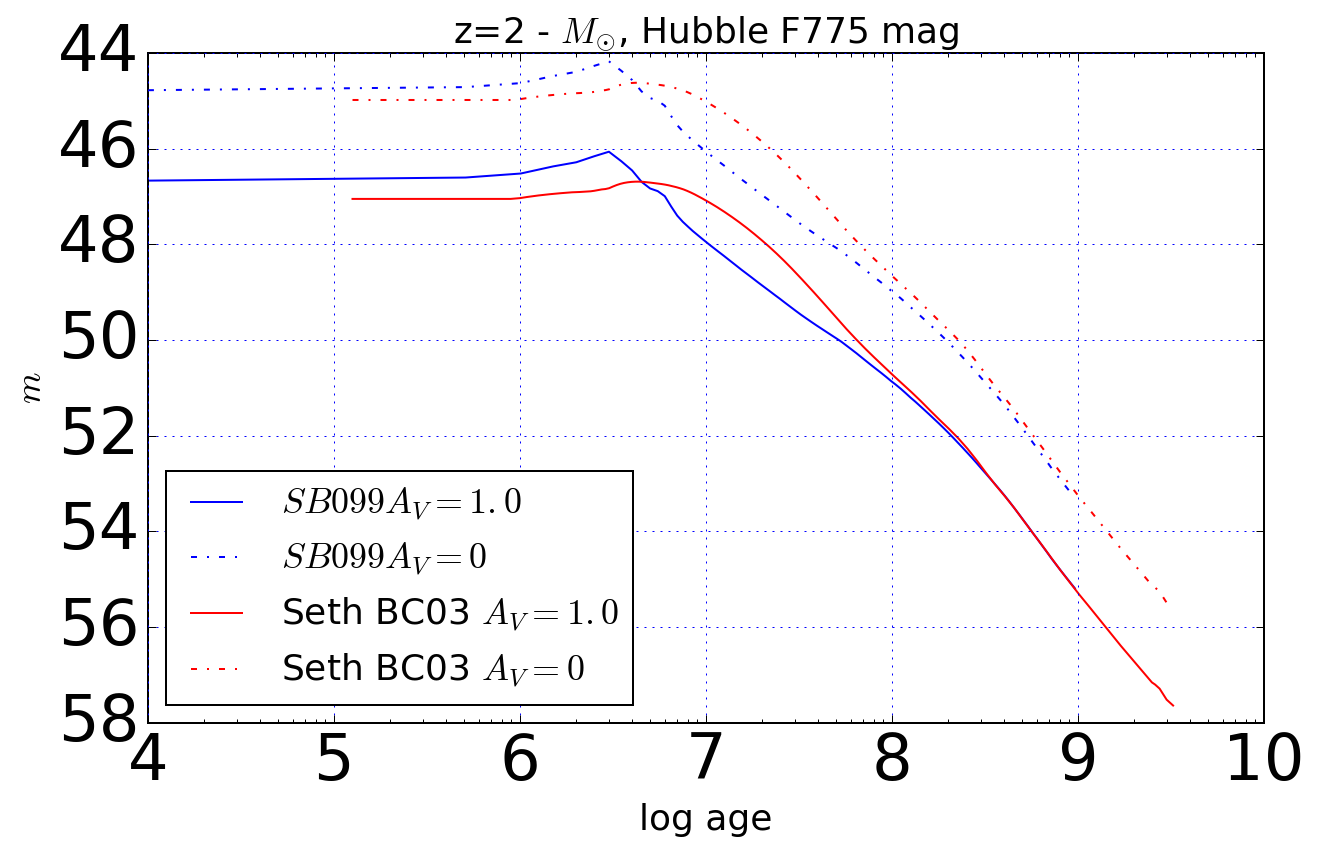

In [22]:
#
#
#
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F775W_ACS'])-48.6+absorpFunc(igm.filtCenters['F775W_ACS']/(1.0+2.0)),"b-")
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F775W_ACS'])-48.6,"b-.")
ax.plot(seth775z2Data['age'],-2.5*np.log10(seth775z2Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth775z2Data['age'],-2.5*np.log10(seth775z2Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=2 - $M_{\odot}$, Hubble F775 mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()


In [18]:
hubbleFilters.keys(),sethsData

(dict_keys(['F125W_WFC3', 'F160W_WFC3', 'F105W_WFC3', 'F435W_ACS', 'F850LP_ACS', 'F606W_ACS', 'F775W_ACS', 'F275W_WFC3', 'F098M_WFC3', 'F336W_WFC3', 'F225W_WFC3']),
 ['seth160z2Data',
  'seth225z2Data',
  'seth435z2Data',
  'seth098z2Data',
  'seth850z2Data',
  'seth775z2Data'])

22644

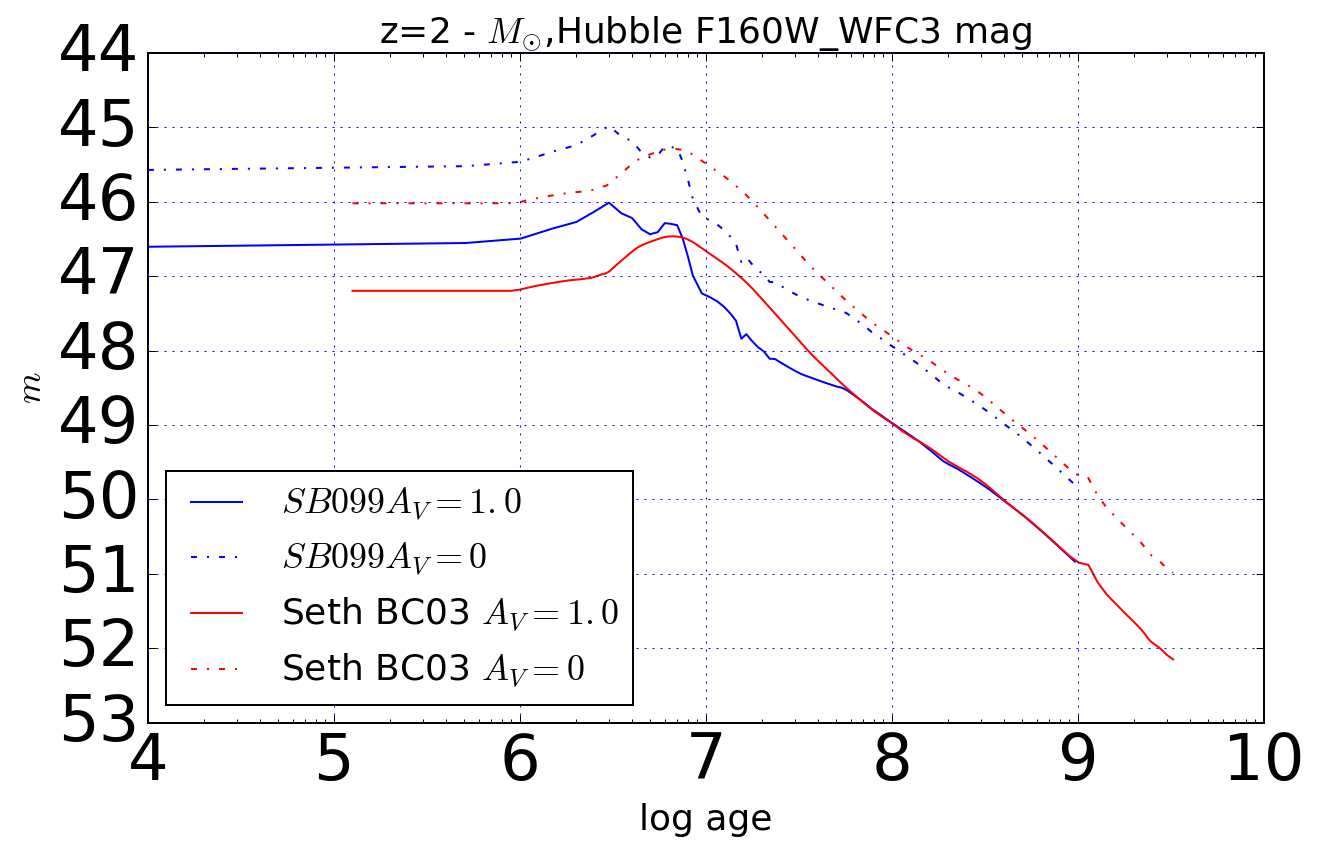

In [23]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F160W_WFC3'])-48.6+absorpFunc(igm.filtCenters['F160W_WFC3']/(1.0+2.0)),"b-")
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F160W_WFC3'])-48.6,"b-.")
ax.plot(seth160z2Data['age'],-2.5*np.log10(seth160z2Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth160z2Data['age'],-2.5*np.log10(seth160z2Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=2 - $M_{\odot}$,Hubble F160W_WFC3 mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()


497

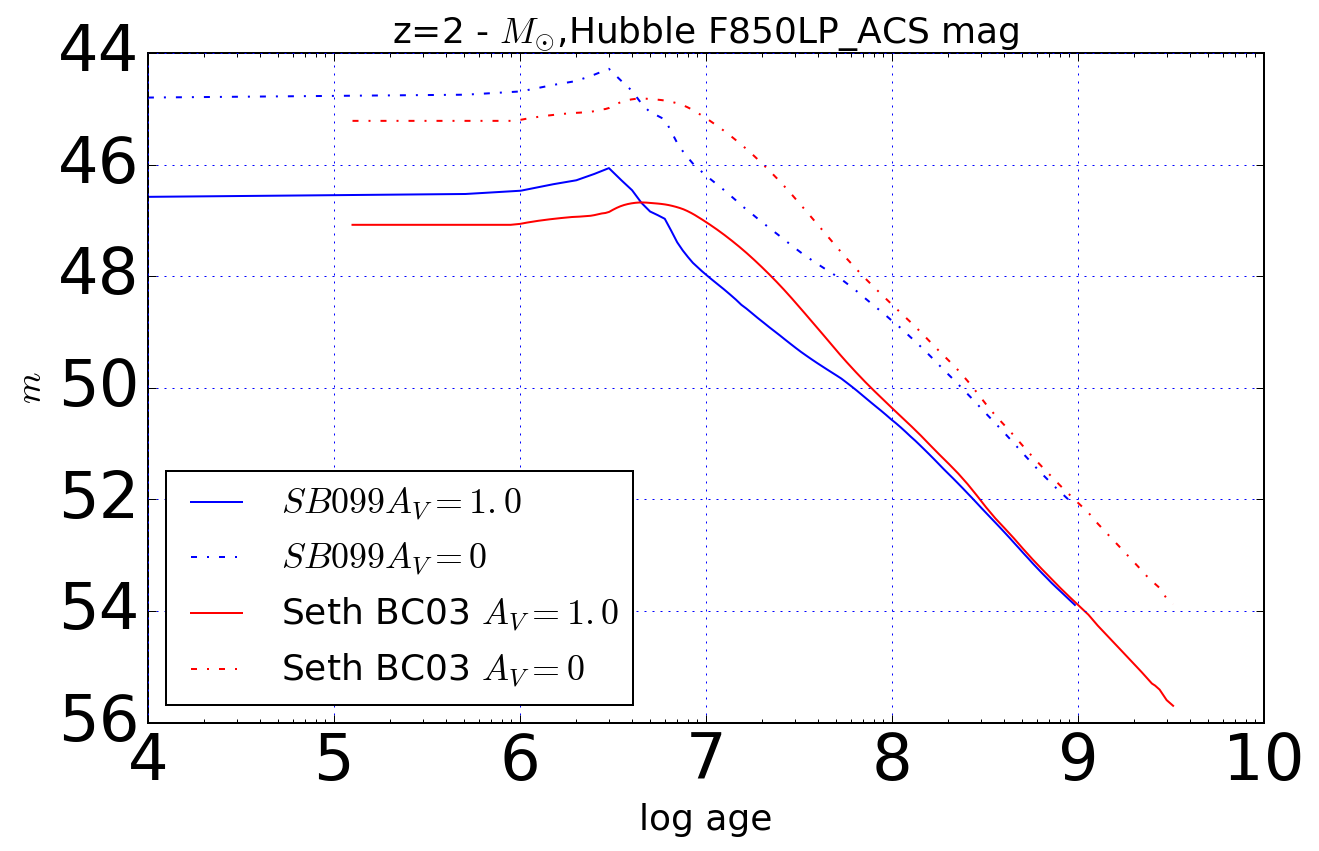

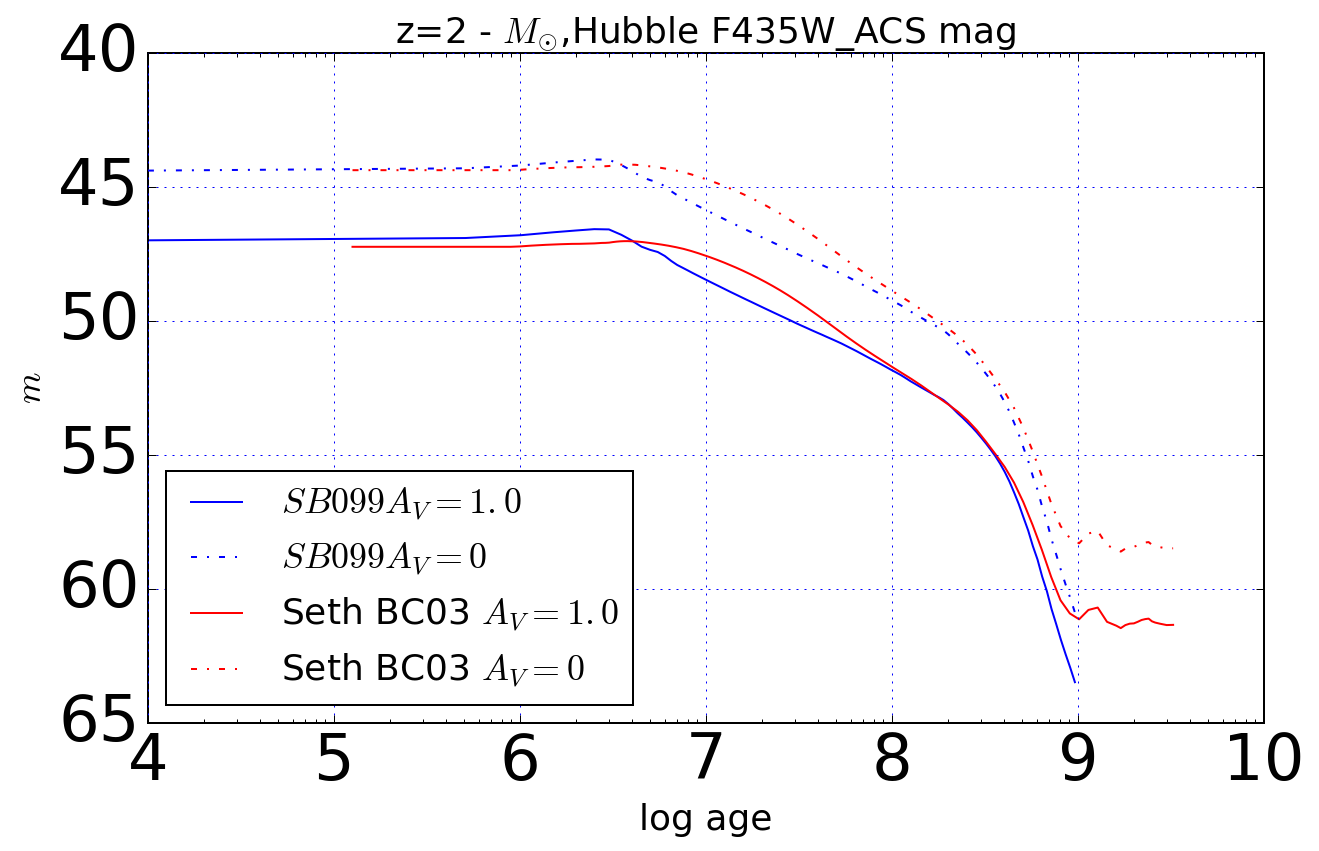

In [24]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F850LP_ACS'])-48.6+absorpFunc(igm.filtCenters['F850LP_ACS']/(1.0+2.0)),"b-")
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F850LP_ACS'])-48.6,"b-.")
ax.plot(seth850z2Data['age'],-2.5*np.log10(seth850z2Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth850z2Data['age'],-2.5*np.log10(seth850z2Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=2 - $M_{\odot}$,Hubble F850LP_ACS mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()

fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F435W_ACS'])-48.6+absorpFunc(igm.filtCenters['F435W_ACS']/(1.0+2.0)),"b-")
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F435W_ACS'])-48.6,"b-.")
ax.plot(seth435z2Data['age'],-2.5*np.log10(seth435z2Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth435z2Data['age'],-2.5*np.log10(seth435z2Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=2 - $M_{\odot}$,Hubble F435W_ACS mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()


In [25]:
sb9902fluxz6 = np.genfromtxt('./SB9902_6.0.gz',names=True, delimiter=',')


497

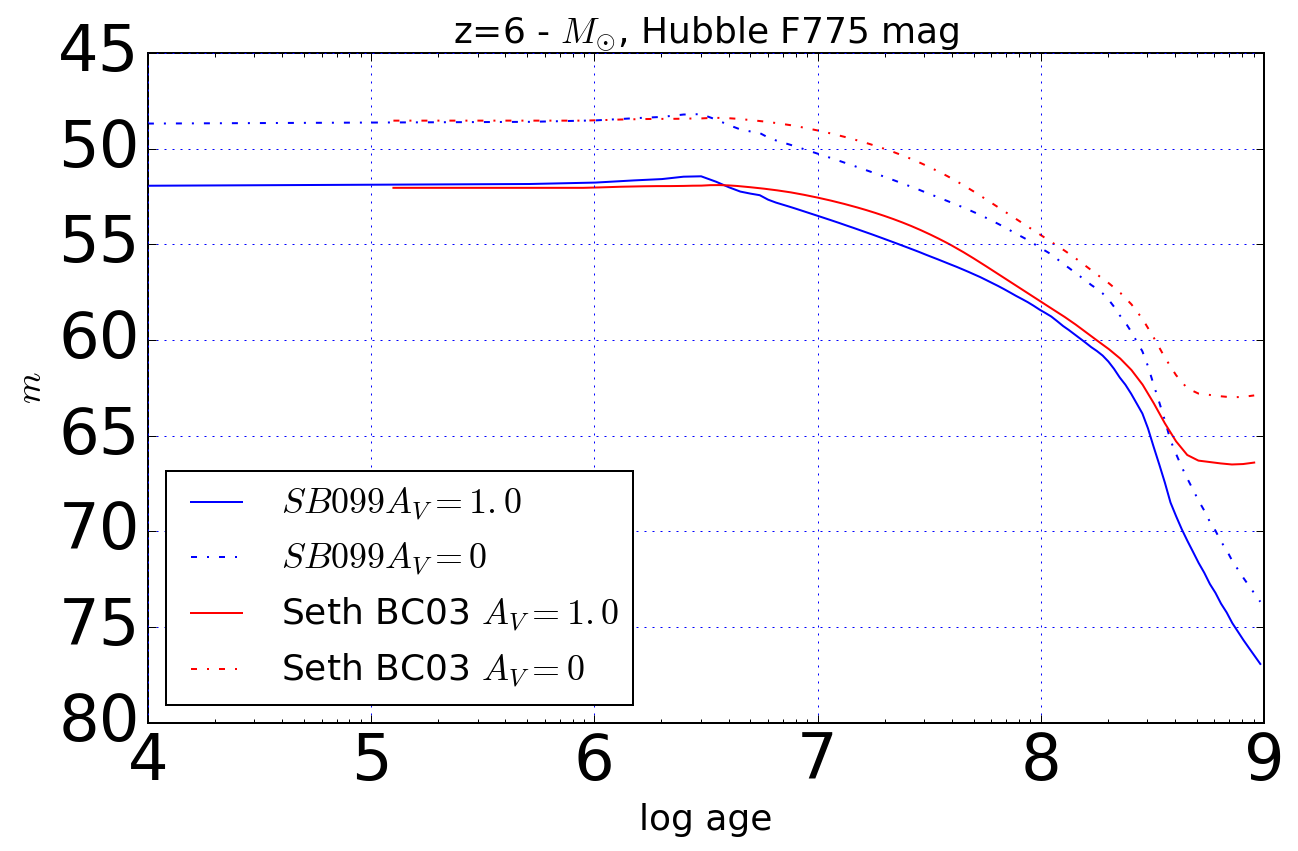

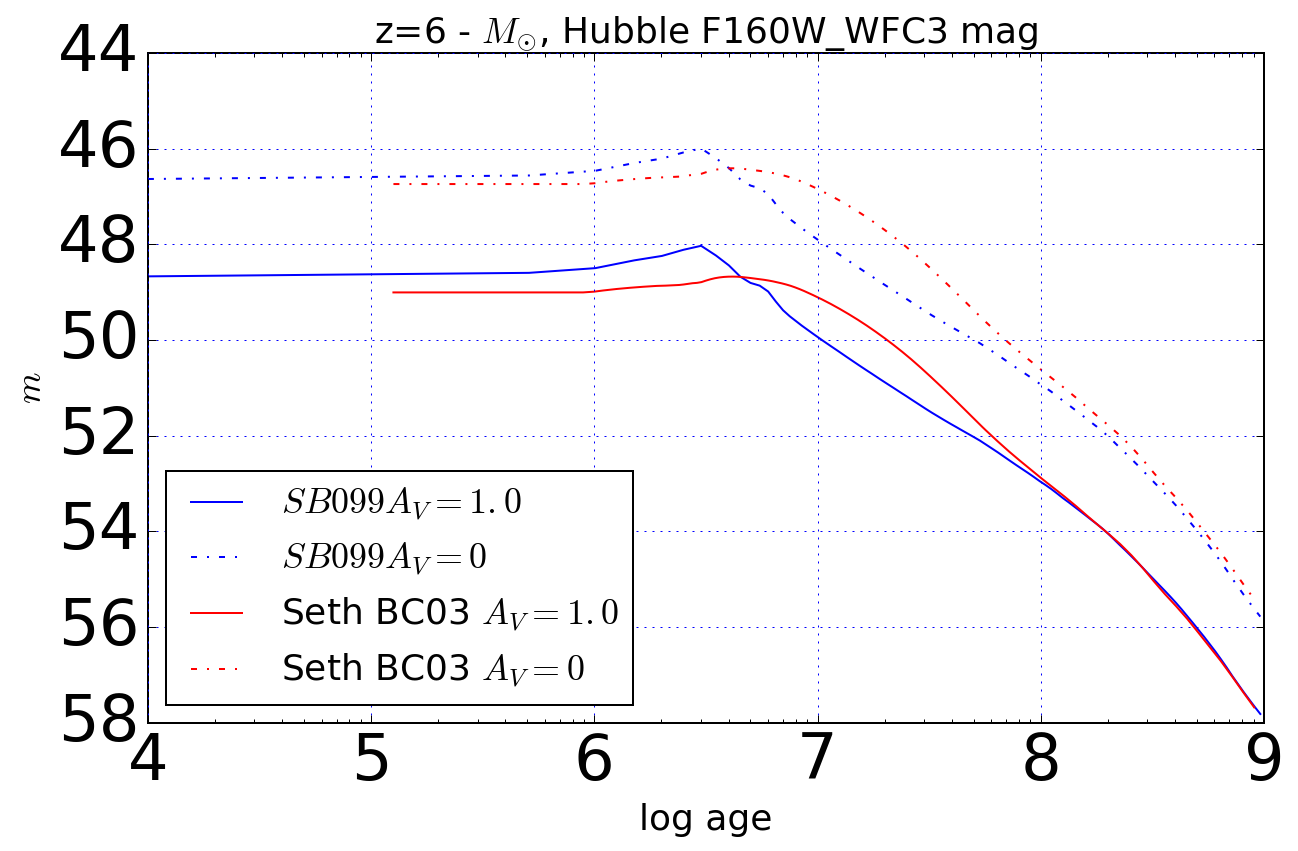

In [26]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F775W_ACS'])-48.6+absorpFunc(igm.filtCenters['F775W_ACS']/(1.0+6.0)),"b-")
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F775W_ACS'])-48.6,"b-.")
ax.plot(seth775z6Data['age'],-2.5*np.log10(seth775z6Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth775z6Data['age'],-2.5*np.log10(seth775z6Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=6 - $M_{\odot}$, Hubble F775 mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()

fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F160W_WFC3'])-48.6+absorpFunc(igm.filtCenters['F160W_WFC3']/(1.0+6.0)),"b-")
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F160W_WFC3'])-48.6,"b-.")
ax.plot(seth160z6Data['age'],-2.5*np.log10(seth160z6Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth160z6Data['age'],-2.5*np.log10(seth160z6Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=6 - $M_{\odot}$, Hubble F160W_WFC3 mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()


/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in log10
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in log10


497

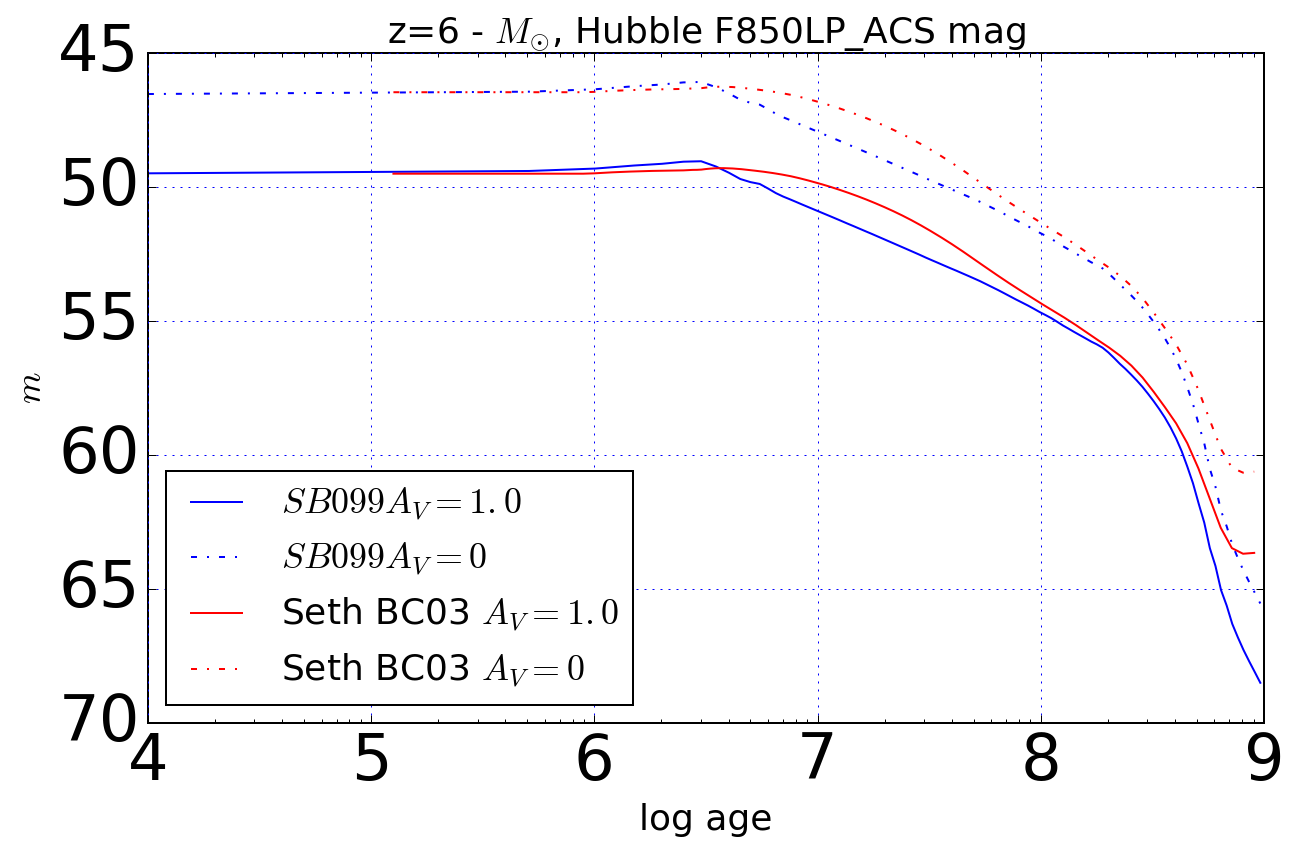

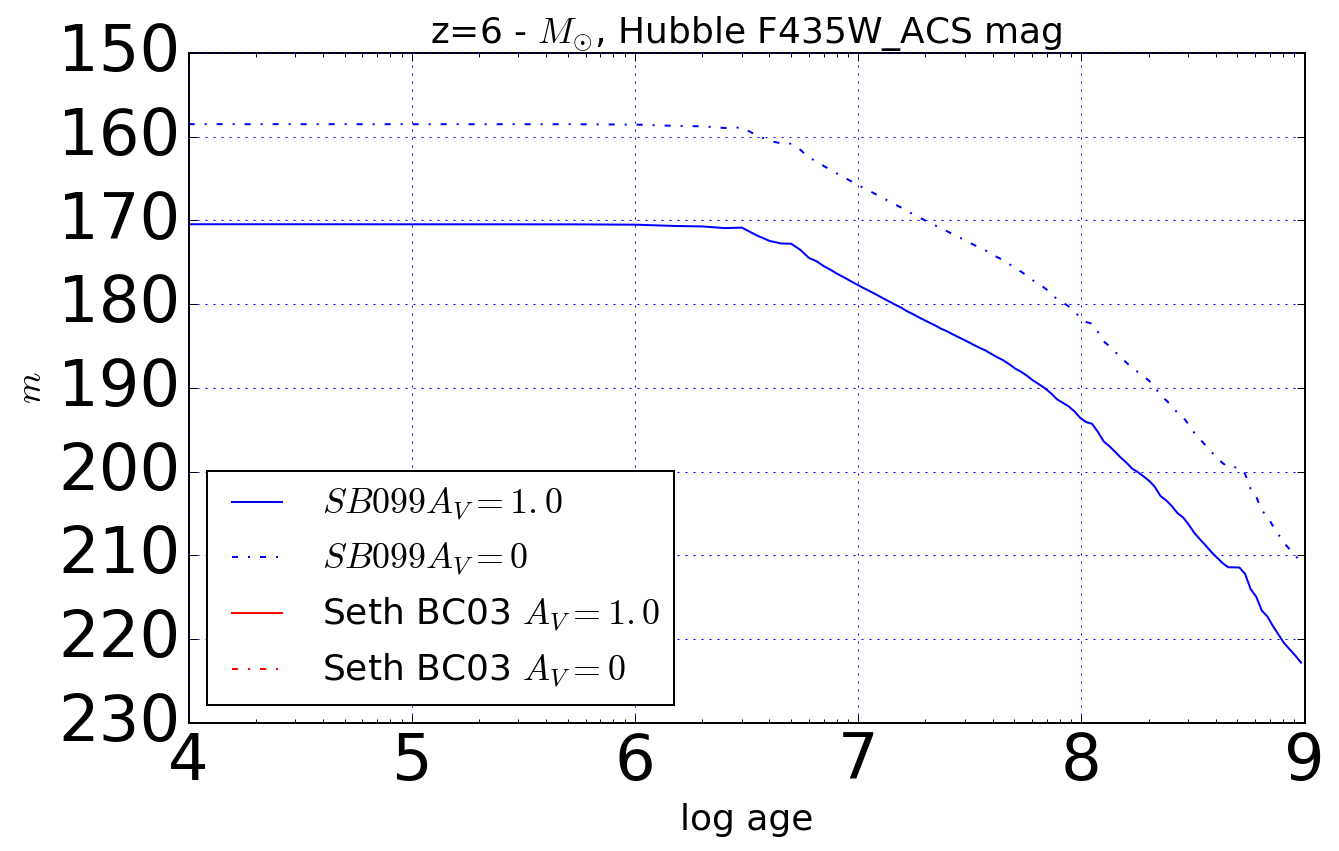

In [27]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F850LP_ACS'])-48.6+absorpFunc(igm.filtCenters['F850LP_ACS']/(1.0+6.0)),"b-")
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F850LP_ACS'])-48.6,"b-.")
ax.plot(seth850z6Data['age'],-2.5*np.log10(seth850z6Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth850z6Data['age'],-2.5*np.log10(seth850z6Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=6 - $M_{\odot}$, Hubble F850LP_ACS mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()

fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F435W_ACS'])-48.6+absorpFunc(igm.filtCenters['F435W_ACS']/(1.0+6.0)),"b-")
ax.plot(10**sb9902fluxz6['LogAge'],-2.5*np.log10(sb9902fluxz6['F435W_ACS'])-48.6,"b-.")
ax.plot(seth435z6Data['age'],-2.5*np.log10(seth435z6Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth435z6Data['age'],-2.5*np.log10(seth435z6Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=6 - $M_{\odot}$, Hubble F435W_ACS mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()


23315

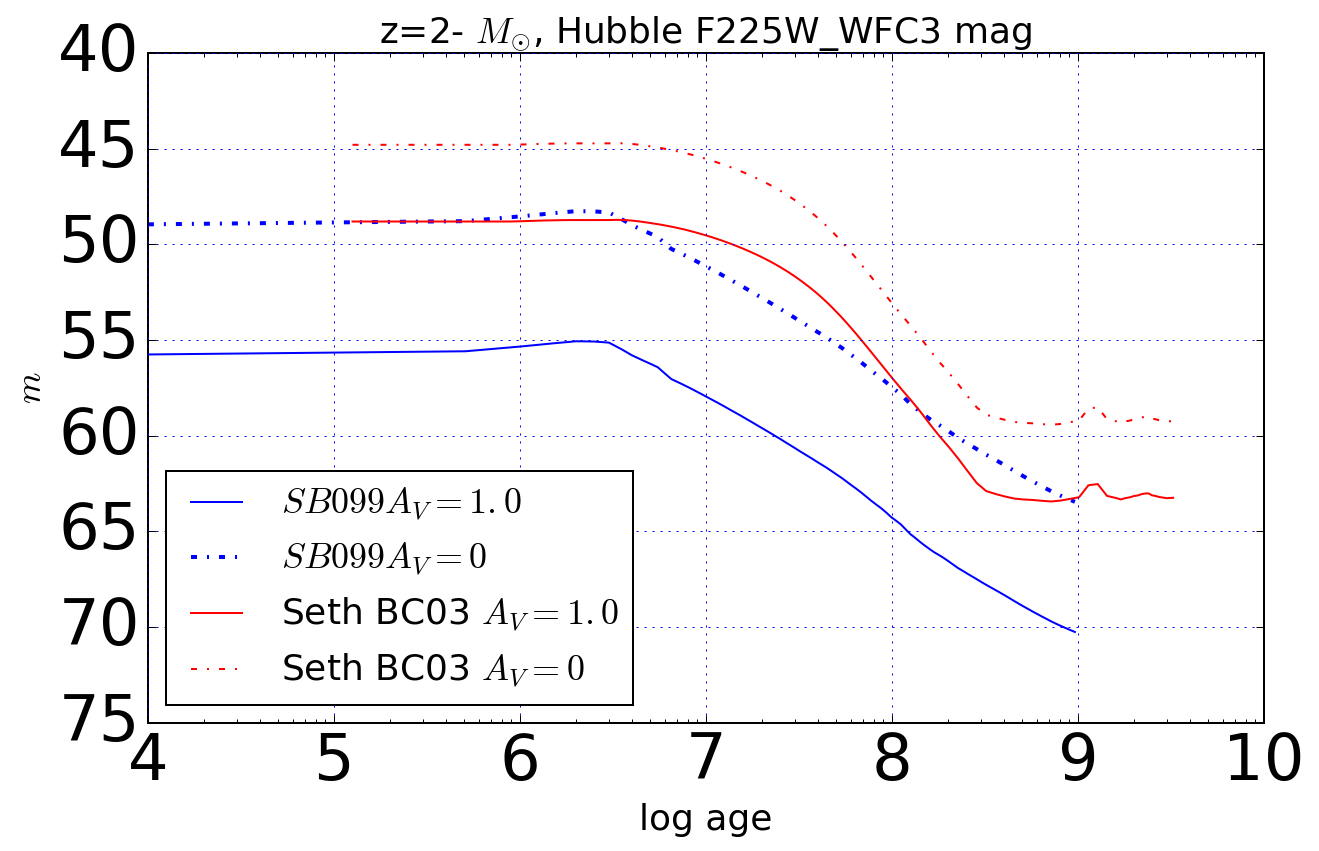

In [28]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Reddening occurs in the rest frame... 
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F225W_WFC3'])-48.6+absorpFunc(igm.filtCenters['F225W_WFC3']/(1.0+2.0)),"b-")
ax.plot(10**sb9902fluxz2['LogAge'],-2.5*np.log10(sb9902fluxz2['F225W_WFC3'])-48.6,"b-.",lw=2)
ax.plot(seth225z2Data['age'],-2.5*np.log10(seth225z2Data['filtfluxz'][5][0])-48.6,"r-")
ax.plot(seth225z2Data['age'],-2.5*np.log10(seth225z2Data['filtfluxz'][0][0])-48.6,"r-.")
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'log age', size=labelsize)
ax.set_ylabel(r'$m$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle=':')
ax.set_title(r'z=2- $M_{\odot}$, Hubble F225W_WFC3 mag',size=labelsize)
ax.xaxis.set_major_formatter(logfmt)
# ax.yaxis.set_major_formatter(logfmt)
ax.invert_yaxis()

ax.legend(['$SB099 A_V = 1.0$','$SB099 A_V = 0$','Seth BC03 $A_V = 1.0$','Seth BC03 $A_V = 0$'], 
          loc='lower left', fontsize=18 )
gc.collect()


## SB99 has move flux in the UV than BC03 does for these populations... 

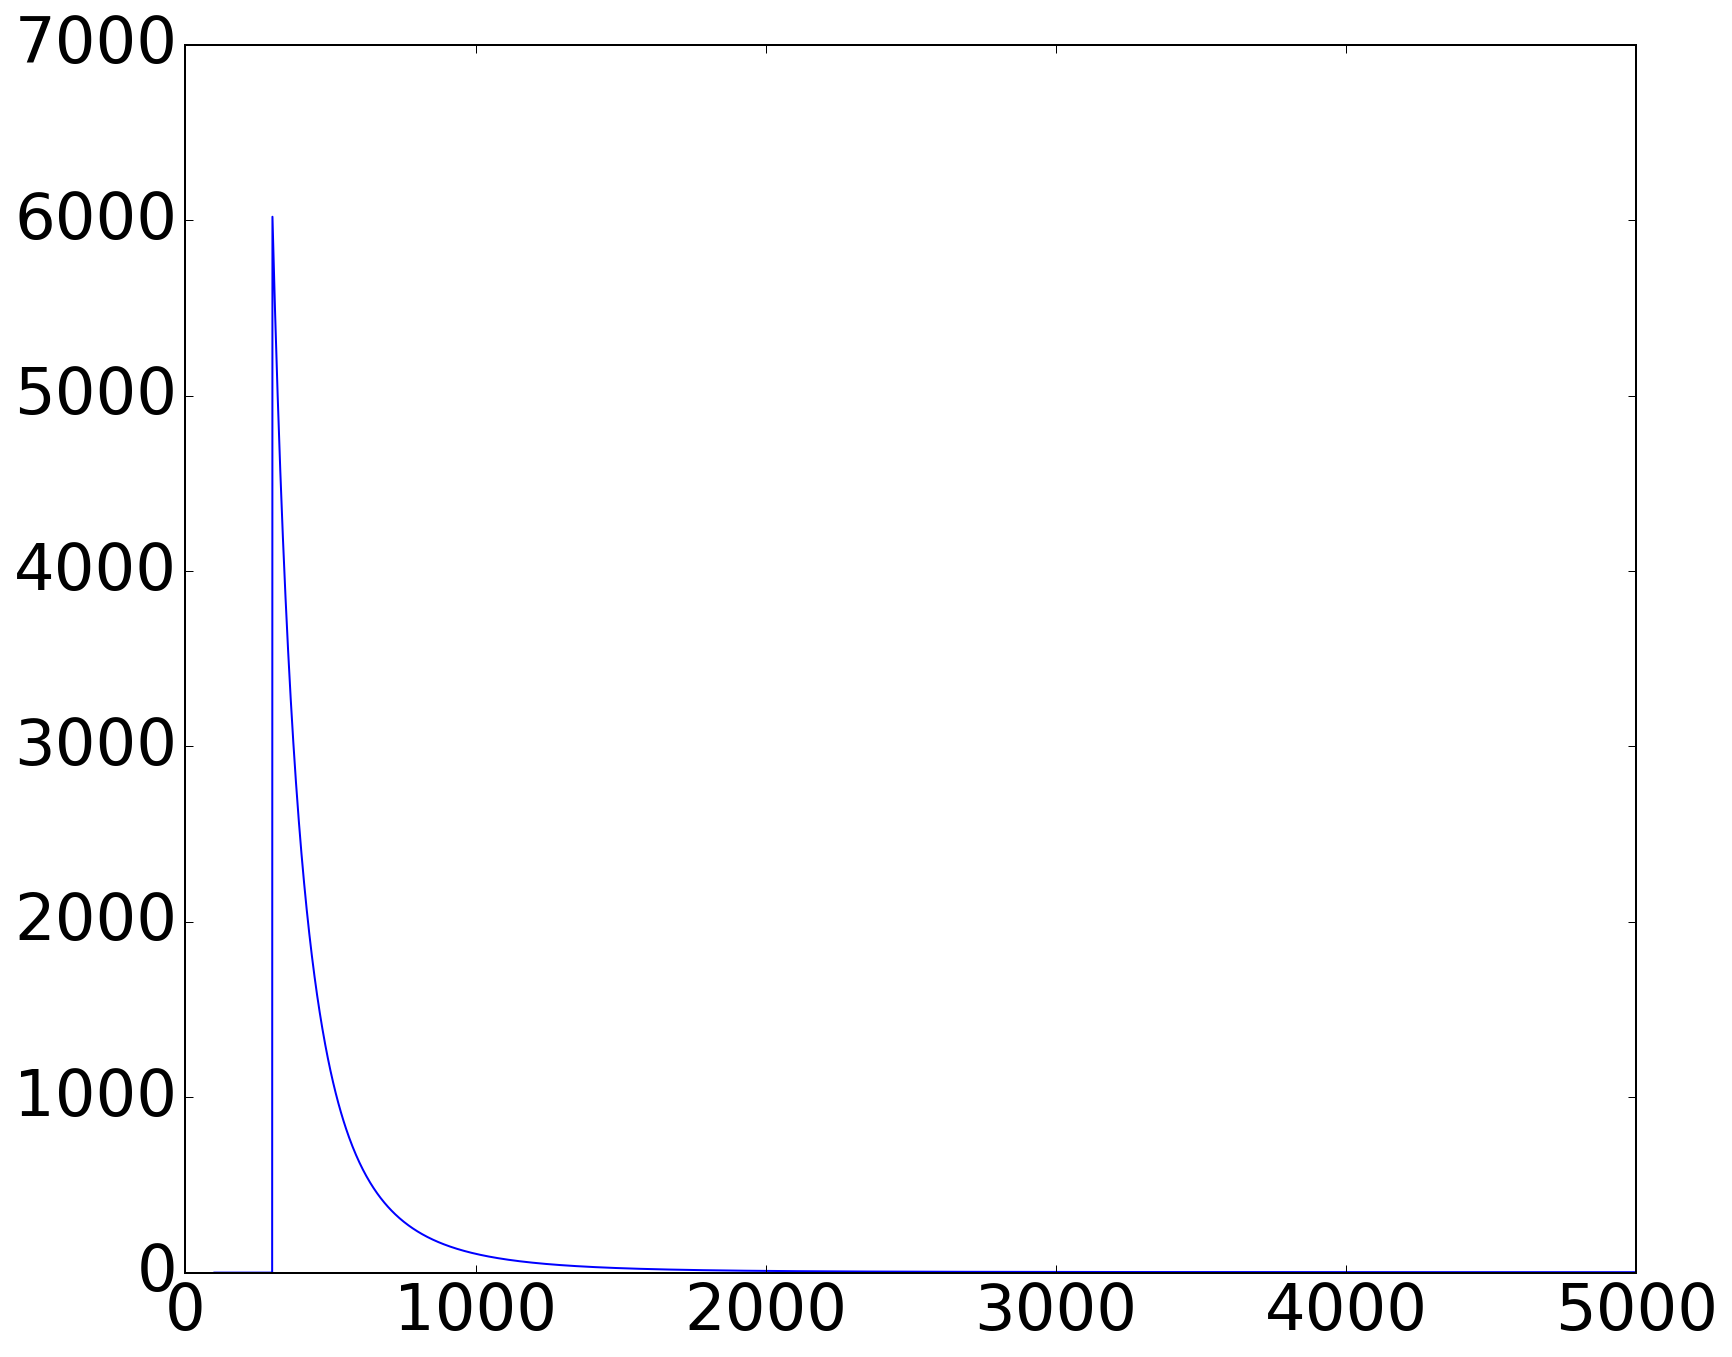

In [70]:
plt.plot(np.arange(100,5000),absorpFunc(np.arange(100,5000)/(1.0+2.0)))

In [71]:
?interp1d

14058

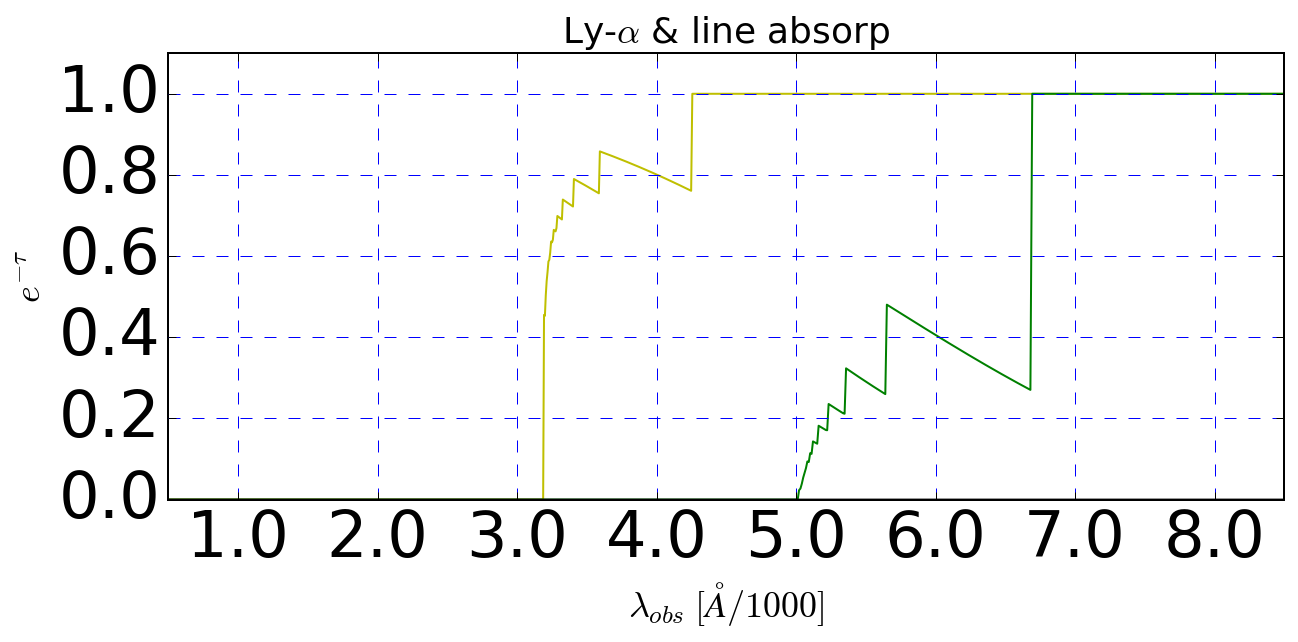

In [71]:
fig = plt.figure(figsize=(10,4))
ax = plt.axes()
lamRange = np.logspace(1.0,5.7,5500)
ax.plot(lamRange,igm.lyTauC(2.5)(lamRange),'y-',
        lamRange,igm.lyTauC(4.5)(lamRange),'g-',
        lamRange,igm.lyTauC(8.5)(lamRange),'k-')

ax.set_xlim([500,8500])
ax.set_ylim([1e-9,1.1])

ax.set_ylabel(r'$e^{-\tau}$', size=labelsize)
ax.set_xlabel(r'$\lambda_{obs}\; [\AA/1000]$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.xaxis.set_major_formatter(divfmt)
ax.set_title(r'Ly-$\alpha$ & line absorp',size=labelsize)
gc.collect()